Chargement des Bibliotheques Instalées sur l'environnement virtuel

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import joblib # Pour stocker le modèle


Importation des données d'entraînement depuis le repo github https://github.com/Yobapatrick/classification_diabete.git




La base de données "Diabete" est disponible sur Kaggle. Cette base de données contient des informations sur des patientes  qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.


La base de données contient les colonnes suivantes :

    Pregnancies : nombre de grossesses
    Glucose : concentration de glucose dans le plasma sanguin à jeun
    BloodPressure : pression artérielle diastolique (mm Hg)
    SkinThickness : épaisseur du pli cutané tricipital (mm)
    Insulin : taux d'insuline sérique de 2 heures (mu U/ml)
    BMI : indice de masse corporelle (kg/m²)
    DiabetesPedigreeFunction : fonction pedigree du diabète
    Age : âge (années)
    Outcome : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)


In [5]:
!git clone https://github.com/Yobapatrick/classification_diabete.git

import pandas as pd

diabete= pd.read_csv("classification_diabete/Data/Diabete.csv")
diabete.head()


fatal: destination path 'classification_diabete' already exists and is not an empty directory.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


Nettoyage des données d'entraînement

In [28]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete.isnull().sum())

Grossesses              0
ConcentrationGlucose    0
PressionArterielle      0
EpaisseurPli            0
TauxInsuline            0
IndiceMasse             0
FonctionPedigree        0
Age                     0
Outcome                 0
dtype: int64


In [8]:

diabete=diabete.rename(columns={
    'Pregnancies':'Grossesses',
    'Glucose':'ConcentrationGlucose',
    'BloodPressure':'PressionArterielle',
    'SkinThickness':'EpaisseurPli',
    'Insulin':'TauxInsuline',
    'BMI':'IndiceMasse',
    'DiabetesPedigreeFunction':'FonctionPedigree'})
diabete.head()

,Grossesses,ConcentrationGlucose,PressionArterielle,EpaisseurPli,TauxInsuline,IndiceMasse,FonctionPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploration des données

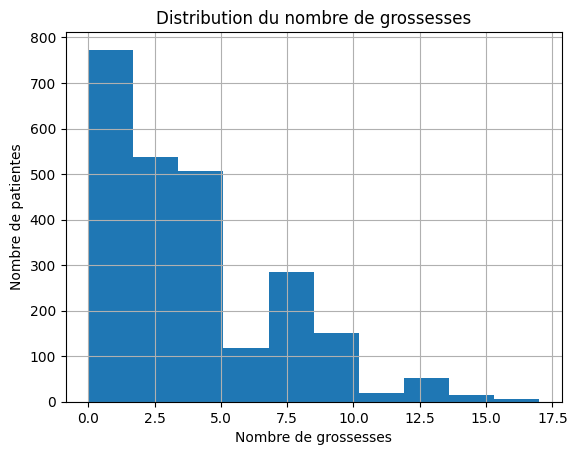

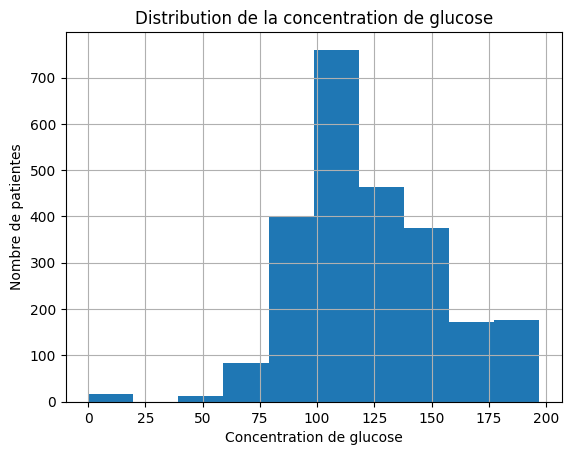

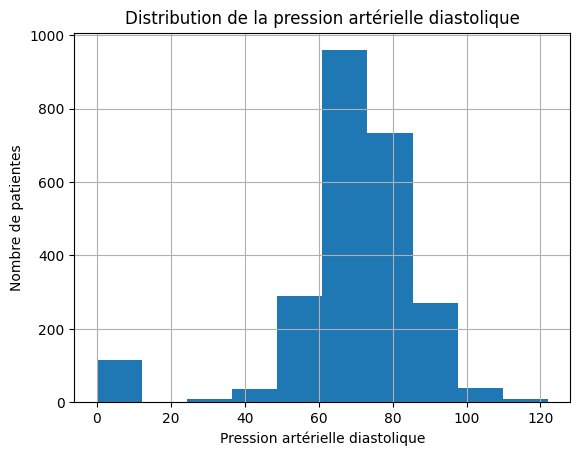

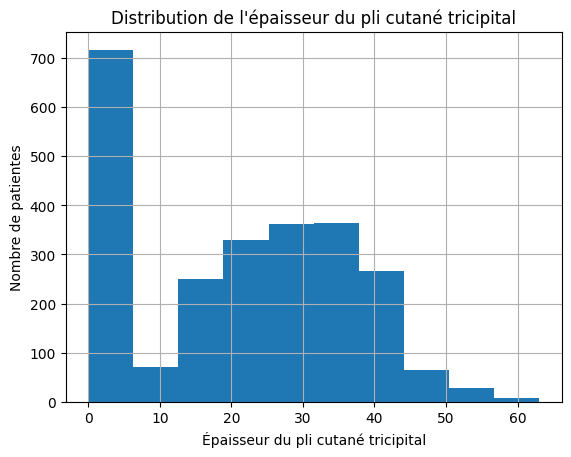

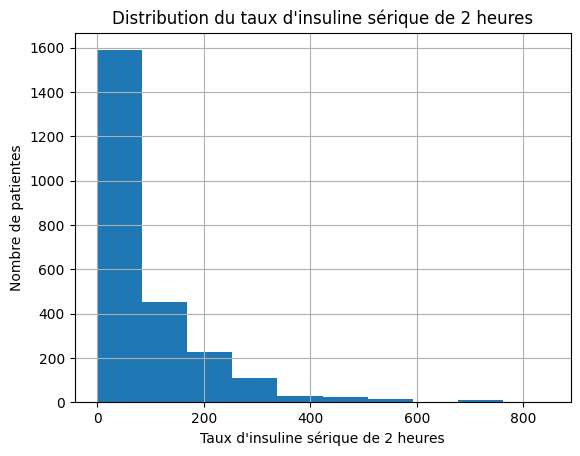

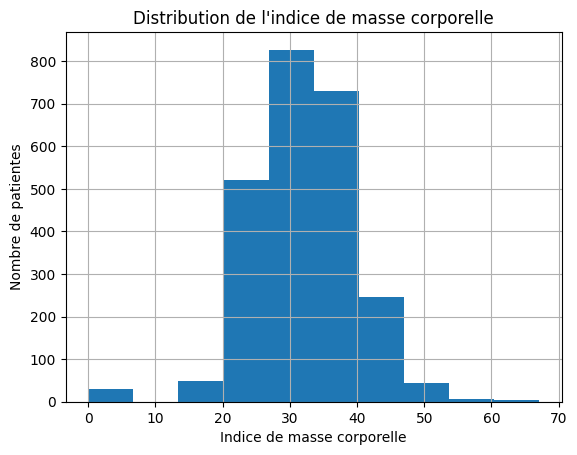

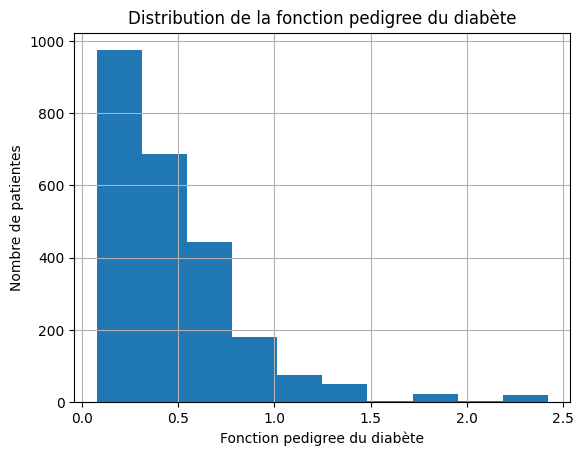

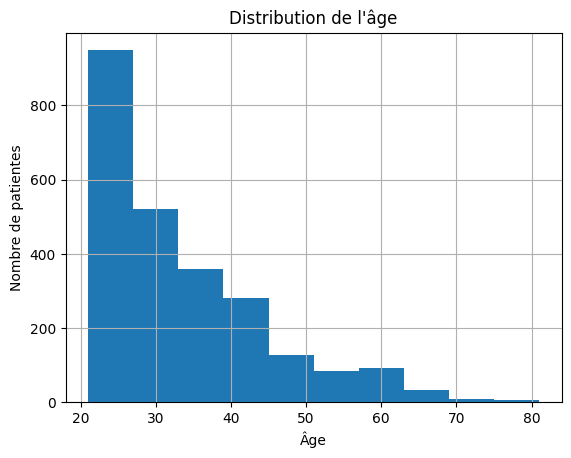

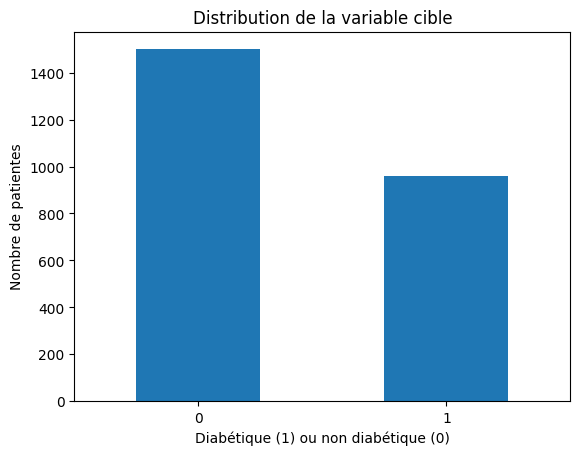

In [30]:
# Histogramme de la variable 'Grossesses'
diabete['Grossesses'].hist()
plt.title('Distribution du nombre de grossesses')
plt.xlabel('Nombre de grossesses')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'ConcentrationGlucose'
diabete['ConcentrationGlucose'].hist()
plt.title('Distribution de la concentration de glucose')
plt.xlabel('Concentration de glucose')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'PressionArterielle'
diabete['PressionArterielle'].hist()
plt.title('Distribution de la pression artérielle diastolique')
plt.xlabel('Pression artérielle diastolique')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'EpaisseurPli'
diabete['EpaisseurPli'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital')
plt.xlabel('Épaisseur du pli cutané tricipital')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'TauxInsuline'
diabete['TauxInsuline'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures')
plt.xlabel('Taux d\'insuline sérique de 2 heures')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'IndiceMasse'
diabete['IndiceMasse'].hist()
plt.title('Distribution de l\'indice de masse corporelle')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'FonctionPedigree'
diabete['FonctionPedigree'].hist()
plt.title('Distribution de la fonction pedigree du diabète')
plt.xlabel('Fonction pedigree du diabète')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Age'
diabete['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de patientes')
plt.show()

# Diagramme en barres de la variable 'Outcome'
diabete['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Diabétique (1) ou non diabétique (0)')
plt.ylabel('Nombre de patientes')
plt.xticks(rotation=0)
plt.show()

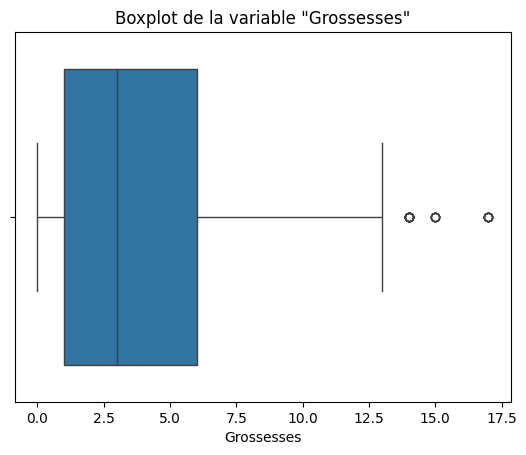

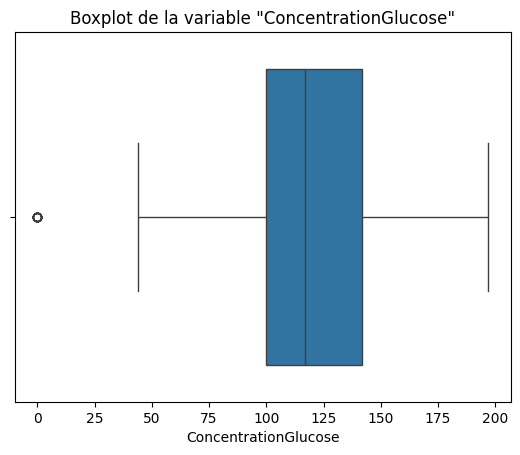

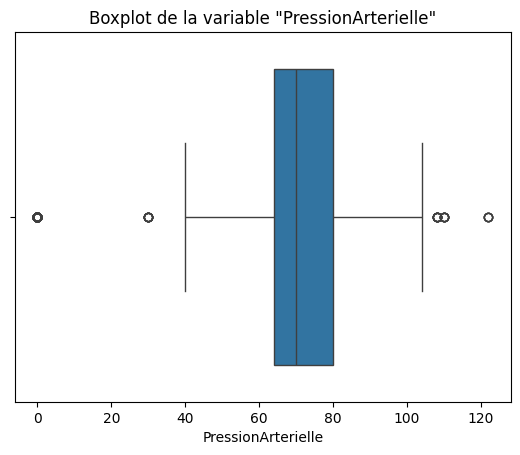

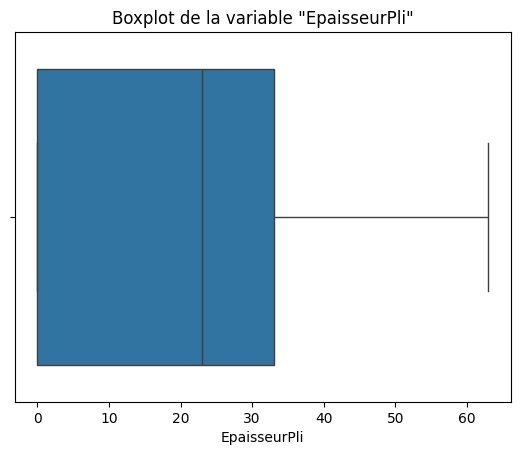

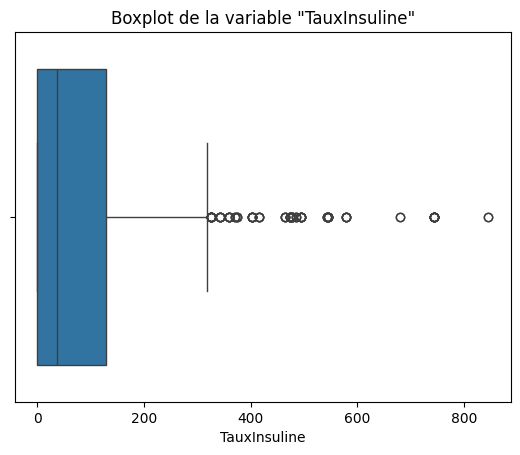

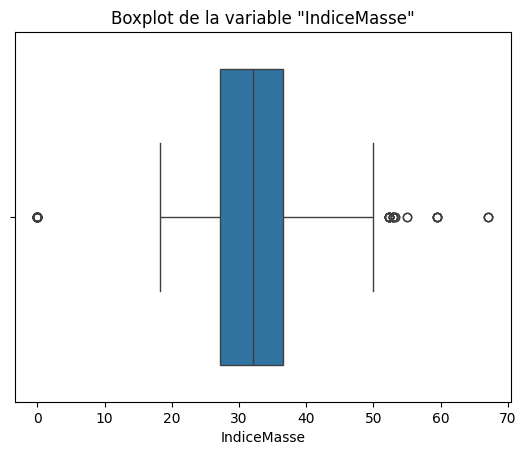

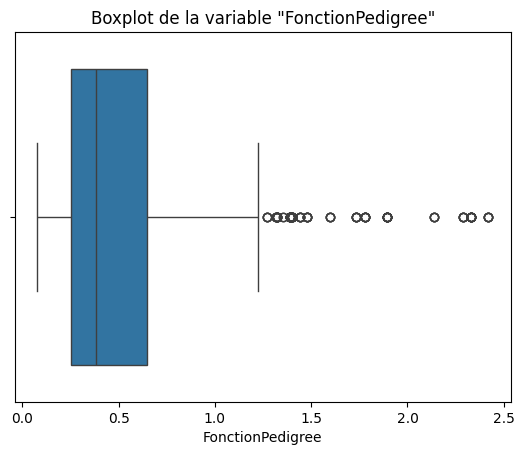

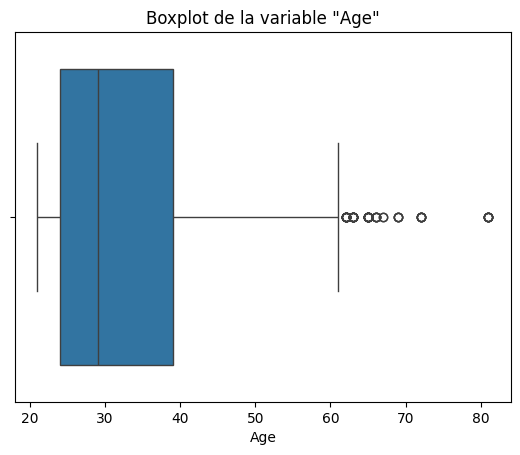

In [35]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Grossesses', 'ConcentrationGlucose', 'PressionArterielle', 'EpaisseurPli', 'TauxInsuline', 'IndiceMasse', 'FonctionPedigree', 'Age']:
    sns.boxplot(x=diabete[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

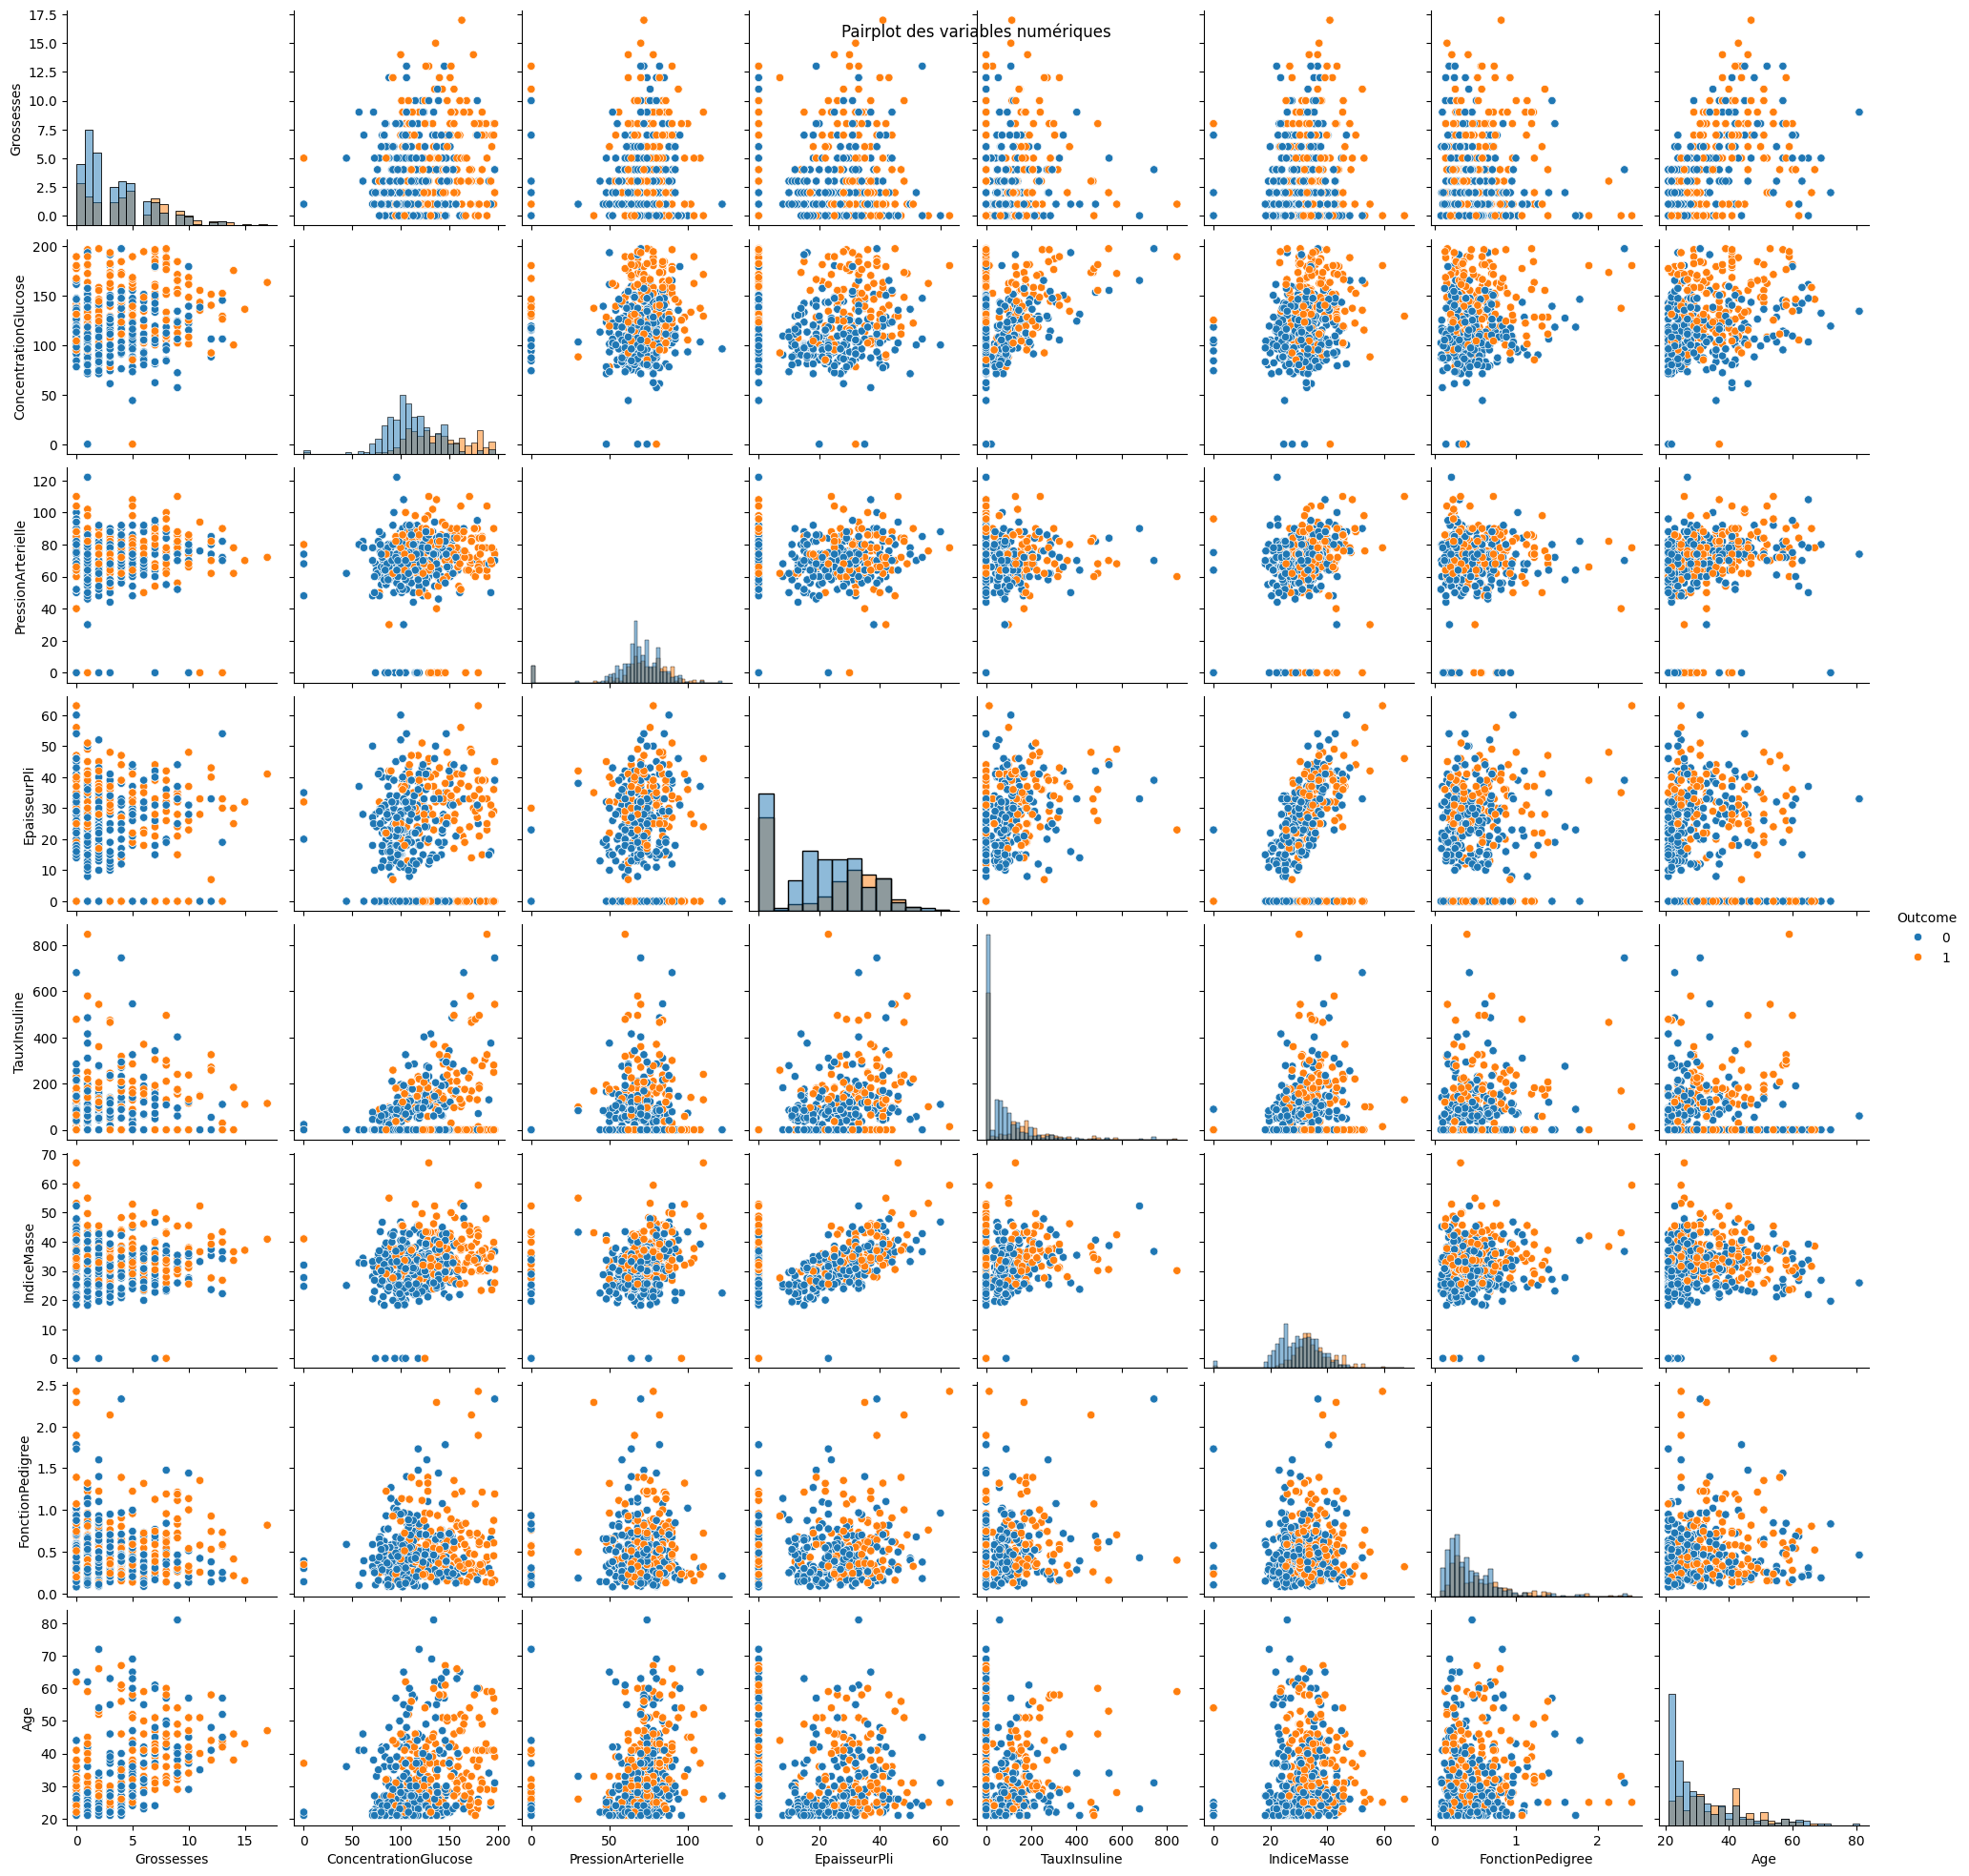

In [36]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='Outcome', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

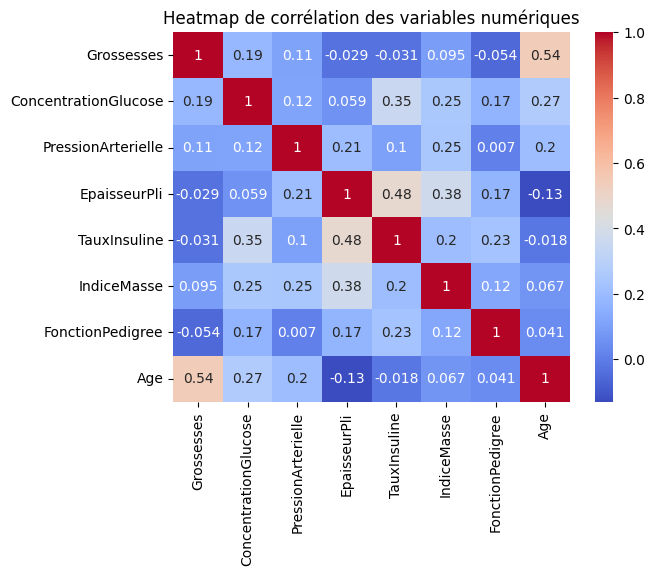

In [37]:
# Sélection des variables numériques
num_vars = ['Grossesses', 'ConcentrationGlucose', 'PressionArterielle', 'EpaisseurPli', 'TauxInsuline', 'IndiceMasse', 'FonctionPedigree', 'Age']
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

Préparation des données pour le modèle :

-Diviser la base de données en deux (20% test et 80%entraînement)
Modélisation Random Forest(forêt aléatoire)

prediction sur l'ensemble des données


In [11]:
from sklearn.model_selection import train_test_split

X = diabete.drop('Outcome', axis=1)  # Variables prédictives
y = diabete['Outcome']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [26]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.997967
1       AUC                      1.0          0.999965
2    Recall                      1.0          0.994652


Un Accuracy et un Recall aussi elevés semblent suspects : cependant, le cross validation score est de 0.99 ce qui indique aue les variables sont tres predictives.

In [27]:
cross_val_score(random_forest, X, y, cv=5).mean()


np.float64(0.9991869918699188)

Visulaisation de la courbe  ROC

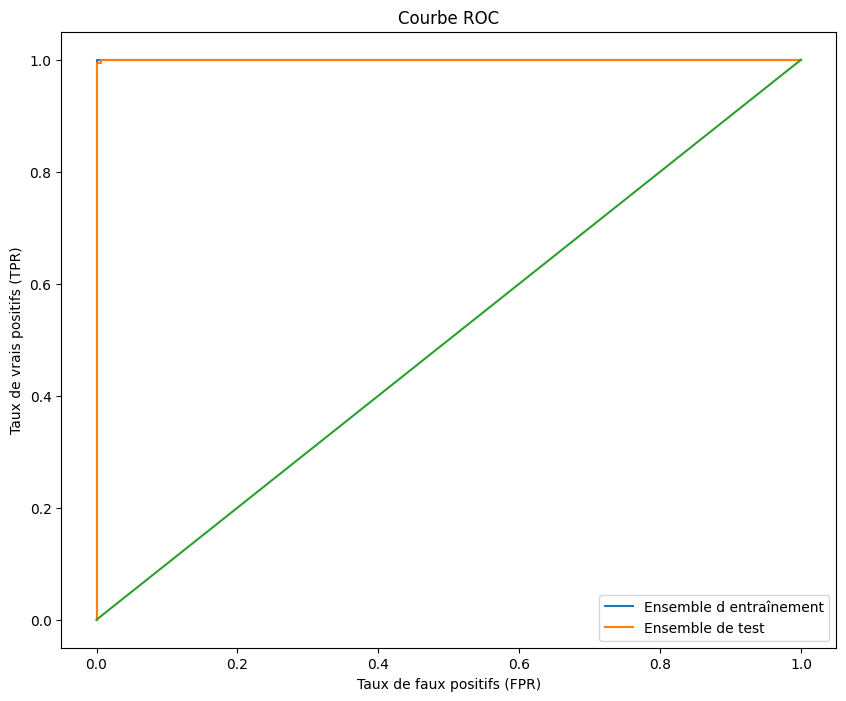

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, label='Ensemble d entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Visualisation de l'importance des variables : Nous remarquons que la variable ayant un grand taux d'importance est la concentration en glucose et la variable la moins significative est la grossesse.

Importance des variables :
               Variable  Importance
0  ConcentrationGlucose    0.243828
1           IndiceMasse    0.178540
2      FonctionPedigree    0.139899
3                   Age    0.125847
4    PressionArterielle    0.097085
5          TauxInsuline    0.074111
6          EpaisseurPli    0.071814
7            Grossesses    0.068876



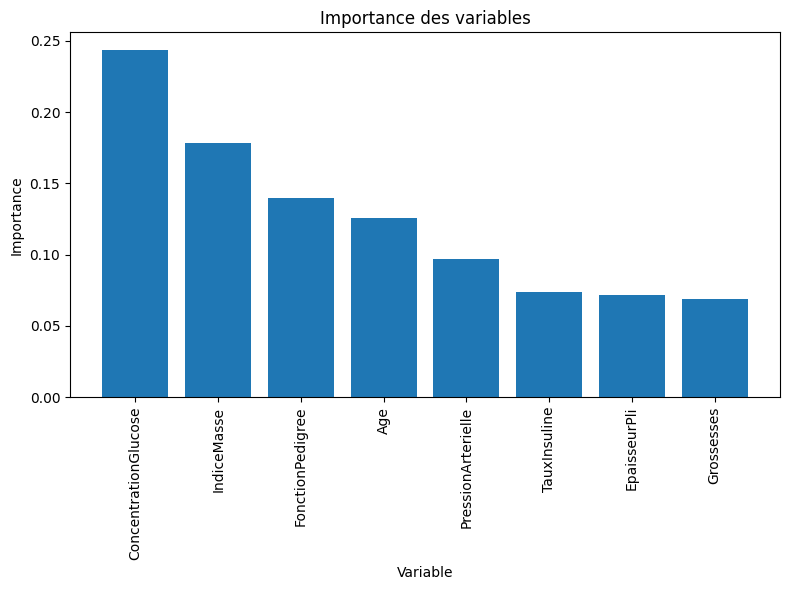

In [19]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

Enregistrement du modèle

In [20]:
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']